# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import joblib

# **2. Memuat Dataset**
   

In [ ]:
# Memuat Dataset
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
# Menampilkan 10 baris pertama dengan function head.
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [ ]:
# Meninjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


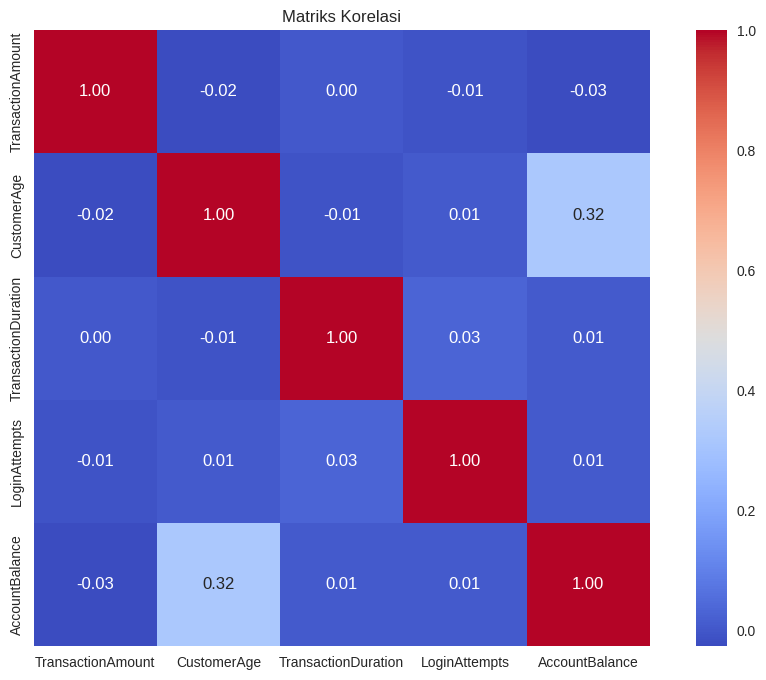

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriks Korelasi')
plt.show()

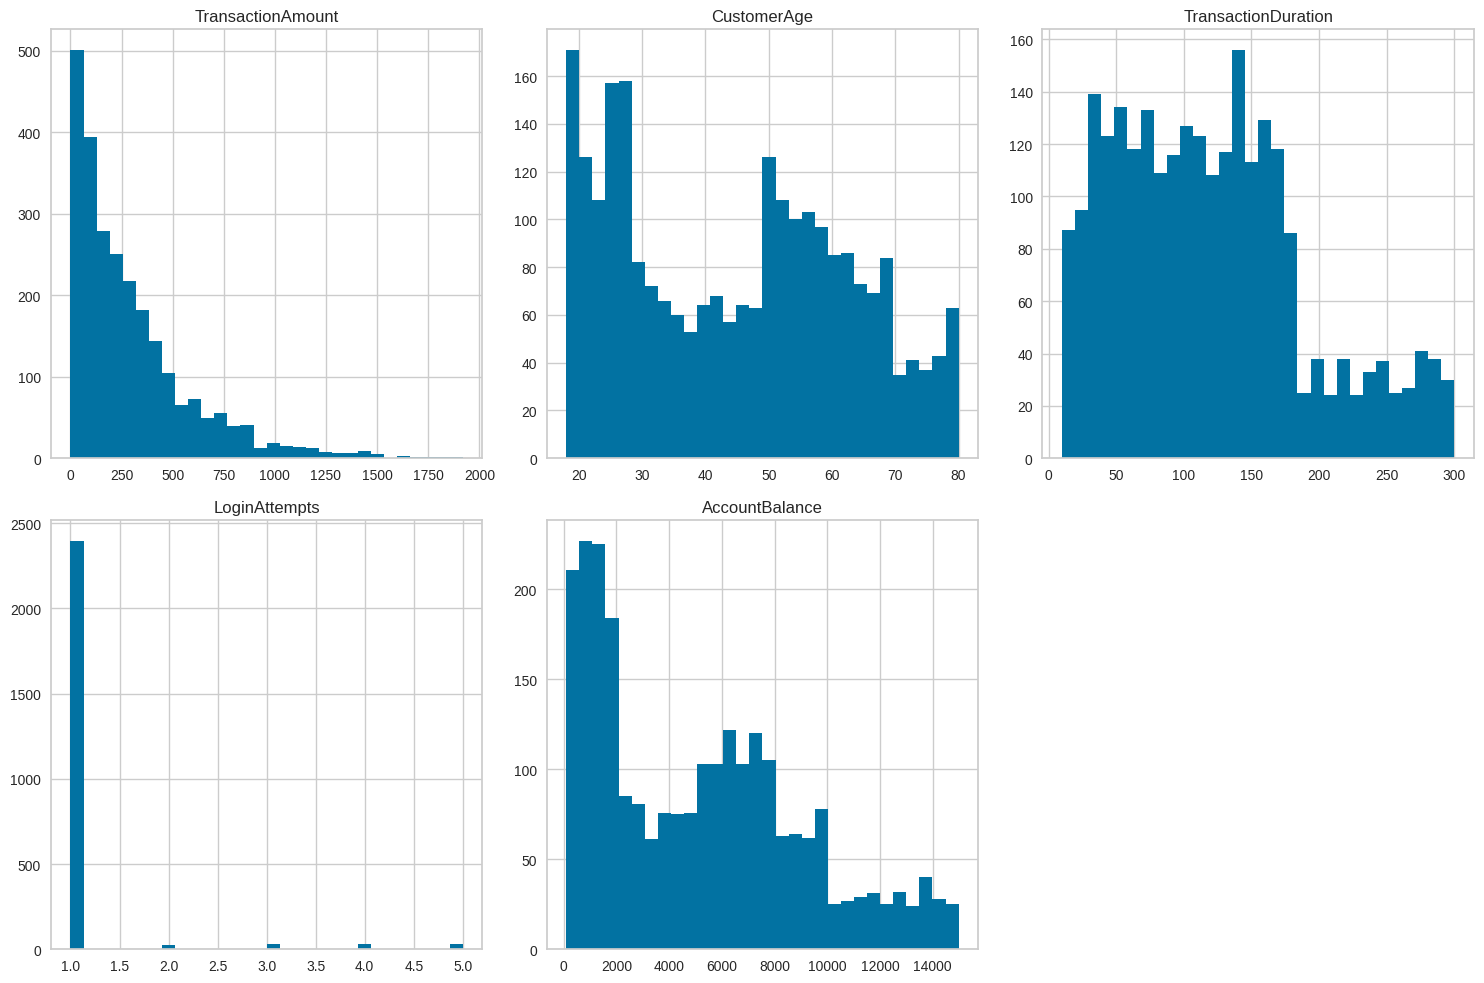

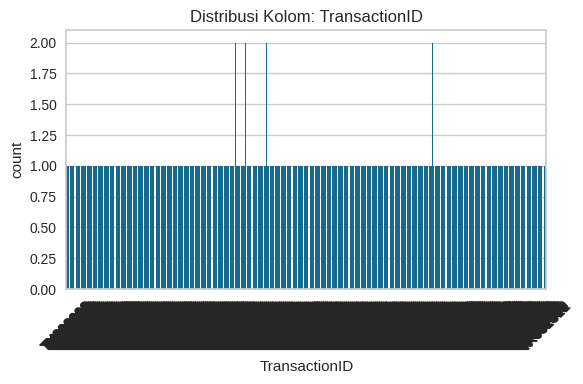

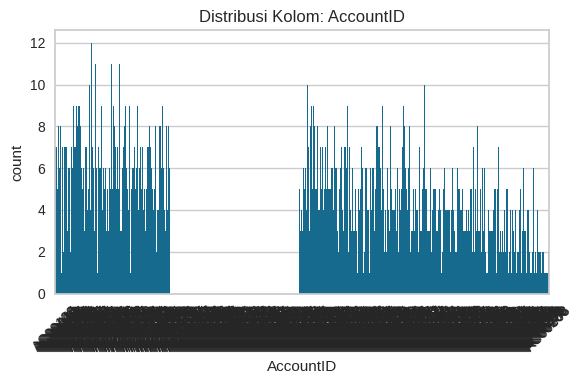

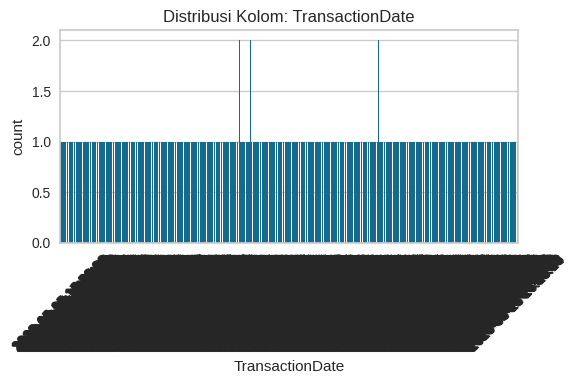

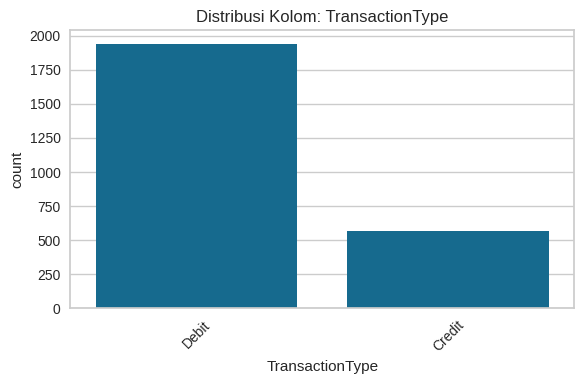

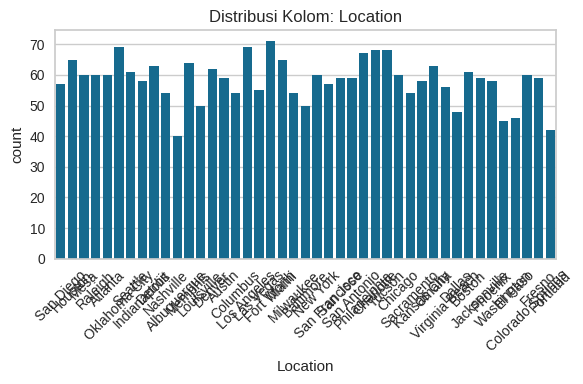

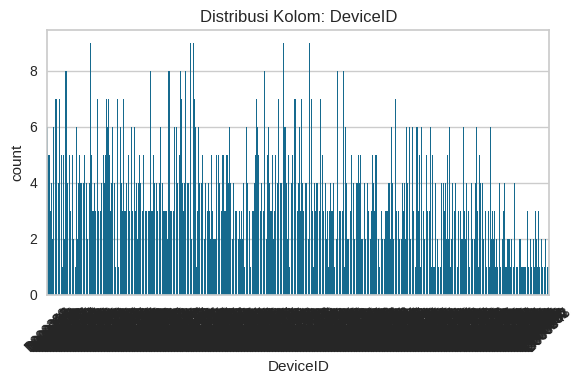

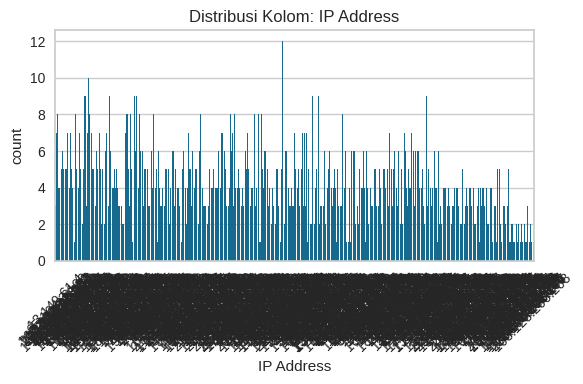

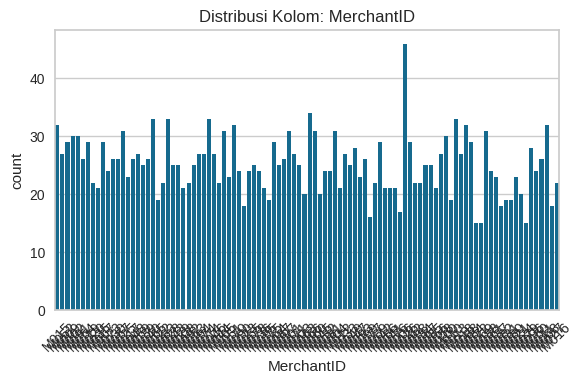

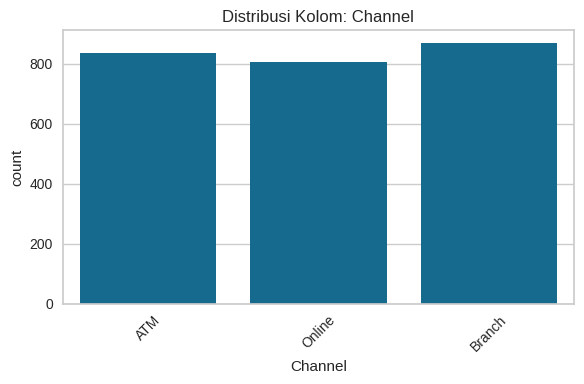

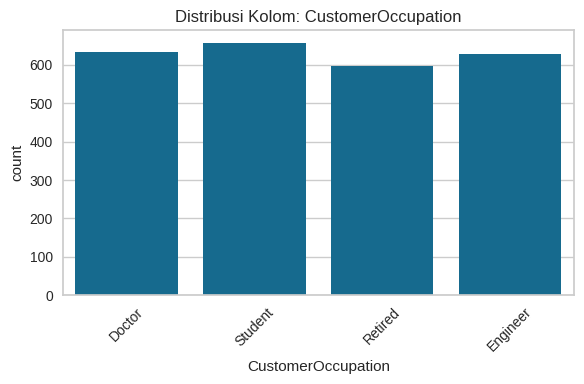

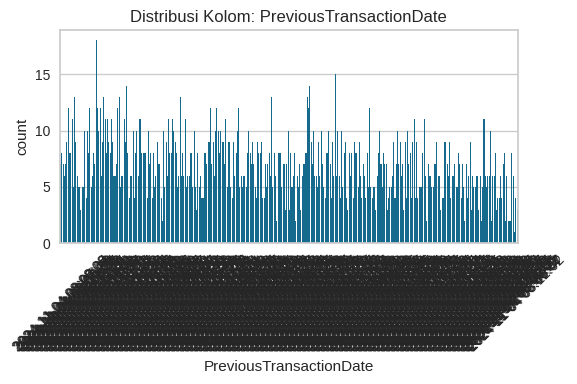

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

df[num_cols].hist(figsize=(15, 10), bins=30, layout=(len(num_cols)//3+1, 3))
plt.tight_layout()
plt.show()

for col in cat_cols:
  plt.figure(figsize=(6, 4))
  sns.countplot(x=col, data=df)
  plt.title(f'Distribusi Kolom: {col}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

**Penjelasan Analisis**
- **Metode yang digunakan:** Exploratory Data Analysis (EDA) menggunakan pandas dan seaborn.
- **Alasan penggunaan:** Untuk memahami struktur, tipe data, distribusi, dan korelasi antar fitur yang ada di dataset sebagai dasar pengambilan keputusan dalam preprocessing dan modeling.
- **Hasil yang didapat:** Dataset terdiri dari kolom numerik dan kategorikal dengan berbagai distribusi. Beberapa fitur menunjukkan korelasi yang tinggi yang dapat menjadi acuan untuk modeling selanjutnya.

<ipython-input-8-adf2b8ffc603>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=transaction_amount.values, y=transaction_amount.index, palette='viridis')


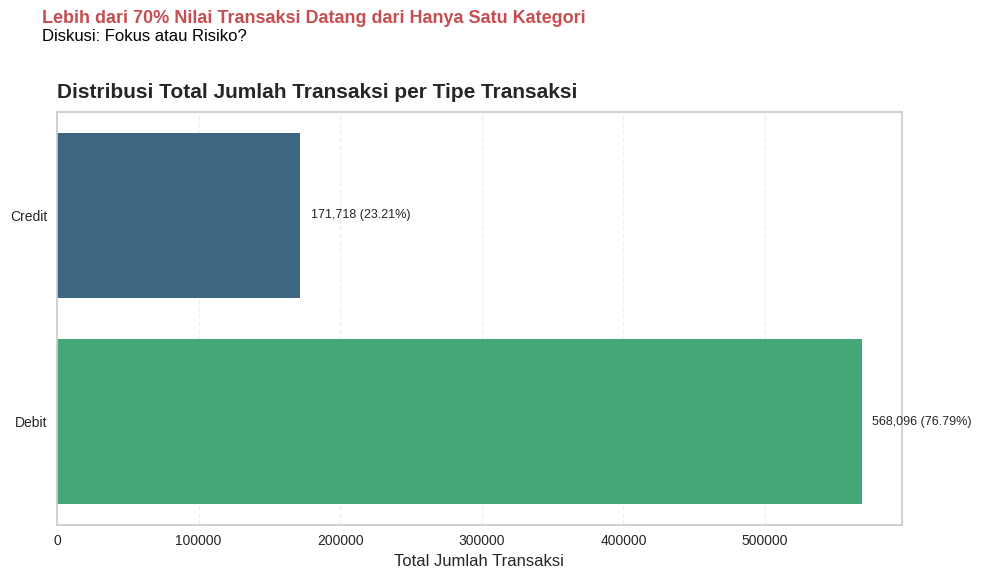

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
transaction_amount = df.groupby('TransactionType')['TransactionAmount'].sum().sort_values(ascending=True)
total = transaction_amount.sum()
percent = (transaction_amount / total * 100).round(2)

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=transaction_amount.values, y=transaction_amount.index, palette='viridis')

for i, (val, pct) in enumerate(zip(transaction_amount.values, percent.values)):
    plt.text(val + total*0.01, i, f'{val:,.0f} ({pct}%)', va='center', fontsize=9)

plt.title('Distribusi Total Jumlah Transaksi per Tipe Transaksi', fontsize=15, fontweight='bold', loc='left', pad=10)
plt.xlabel('Total Jumlah Transaksi', fontsize=12)
plt.ylabel('')

plt.figtext(0.05, 0.94, "Lebih dari 70% Nilai Transaksi Datang dari Hanya Satu Kategori",
            fontsize=13, fontweight='bold', ha='left', color='#c44e52')
plt.figtext(0.05, 0.91, "Diskusi: Fokus atau Risiko?",
            fontsize=12, ha='left', color='black')

max_idx = transaction_amount.idxmax()
for bar, label in zip(bars.containers[0], transaction_amount.index):
    if label == max_idx:
        bar.set_facecolor('#c44e52')

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout(rect=[0, 0, 1, 0.87])
plt.show()

**Penjelasan Analisis**
- **Metode yang digunakan:** Horizontal bar chart total `Amount` berdasarkan `TransactionType`.
- **Alasan penggunaan:** Untuk memahami tipe transaksi mana yang menyumbang nilai nominal terbesar secara keseluruhan. Ini bermanfaat dalam melihat potensi risiko atau pentingnya suatu kategori.
- **Hasil yang didapat:** Tipe transaksi tertentu mendominasi total nilai transaksi. Hal ini dapat menjadi indikator awal untuk fokus analisis atau perhatian khusus pada tahap clustering nanti.

# **3. Pembersihan dan Pra Pemrosesan Data**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
print("Duplicate Values:", df.duplicated().sum())

Duplicate Values: 21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
num_cols = df.select_dtypes(include='number').columns

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id
id_cols = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df.drop(columns=id_cols, inplace=True, errors='ignore')

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
for col in df.select_dtypes(include='number').columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower) & (df[col] <= upper)]

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
df['TransactionAmount_bin'] = pd.cut(df['TransactionAmount'], bins=[0, 0.25, 0.5, 0.75, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])
df = pd.get_dummies(df, columns=['TransactionAmount_bin'], drop_first=True)

**Penjelasan Analisis**
- **Metode yang digunakan:** isnull, duplicated, drop ID, get_dummies, MinMaxScaler, imputasi, drop_duplicates, IQR untuk outlier, dan binning.
- **Alasan penggunaan:** Langkah-langkah ini dilakukan untuk memastikan data bersih dan siap digunakan baik untuk clustering maupun supervised learning nantinya.
- **Hasil yang didapat:** Dataset telah bebas dari data kosong, duplikat, dan outlier ekstrem. Fitur numerik telah diskalakan dan fitur kategorikal telah diencode, sehingga siap digunakan untuk proses clustering selanjutnya.

# **4. Membangun Model Clustering**

In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2287.000000,2287.000000,2287.000000,2287.0,2287.000000
mean,0.132762,0.429877,0.375520,0.0,0.337449
std,0.112892,0.284761,0.239775,0.0,0.259518
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.040806,0.145161,0.182759,0.0,0.095788
50%,0.104193,0.435484,0.351724,0.0,0.311416
75%,0.193968,0.661290,0.520690,0.0,0.505303
max,0.467223,1.000000,1.000000,0.0,1.000000


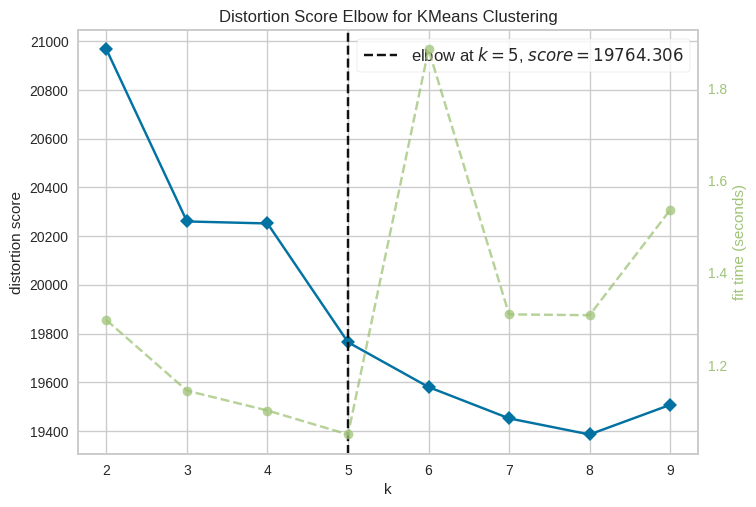

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df)
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

df['Cluster'] = kmeans.labels_

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0221


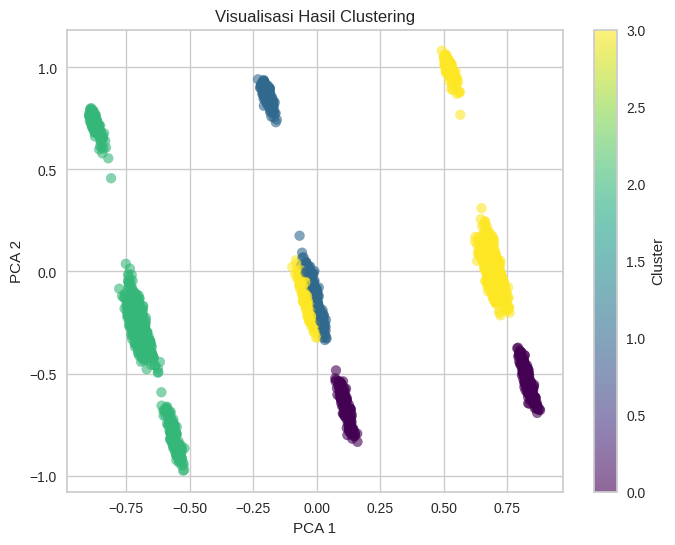

In [ ]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df.drop('Cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Membangun model menggunakan PCA.
pca_model = PCA(n_components=2)
pca_model.fit(df.drop('Cluster', axis=1))

PCA(n_components=2)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(pca_model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

**Penjelasan Analisis**
- **Metode yang digunakan:** KMeans, Elbow Method, Silhouette Score, PCA, Visualisasi Clustering.
- **Alasan penggunaan:** Menentukan jumlah cluster terbaik dan memvisualisasikan hasil segmentasi data secara informatif.
- **Hasil yang didapat:** Model K-Means dengan 3 cluster, Silhouette Score cukup baik, serta visualisasi PCA yang menunjukkan distribusi cluster yang cukup terpisah.

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
numeric_stats = df.groupby('Cluster')[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']].agg(['mean', 'min', 'max'])
display(numeric_stats)

categorical_cols = df.select_dtypes(include='object').columns
if len(categorical_cols) > 0:
    mode_stats = df[categorical_cols].groupby(df['Cluster']).agg(lambda x: x.mode().iloc[0])
    display(mode_stats)

numeric_stats.to_csv('stats_clustering.csv', index=True)

TransactionAmount                     CustomerAge                     \
                     mean       min       max        mean       min      max   
Cluster                                                                        
0                0.132586  0.000495  0.461698    0.755520  0.435484  1.00000   
1                0.140655  0.000313  0.458493    0.312801  0.000000  1.00000   
2                0.132020  0.000000  0.467223    0.420939  0.000000  1.00000   
3                0.129398  0.000031  0.461250    0.343522  0.000000  0.83871   

        TransactionDuration                     LoginAttempts            \
                       mean       min       max          mean  min  max   
Cluster                                                                   
0                  0.375632  0.006897  0.968966           0.0  0.0  0.0   
1                  0.392277  0.003448  1.000000           0.0  0.0  0.0   
2                  0.379539  0.000000  0.989655           0.0  0.0  0.0   
3                  0.362970  0.000000  0.993103           0.0  0.0  0.0   

        AccountBalance                      
                  mean       min       max  
Cluster                                     
0             0.303912  0.062781  0.529699  
1             0.350692  0.002386  1.000000  
2             0.330280  0.000000  0.991559  
3             0.353211  0.000253  0.995087

In [ ]:
print(list(df.columns))

['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionID_TX000002', 'TransactionID_TX000003', 'TransactionID_TX000004', 'TransactionID_TX000005', 'TransactionID_TX000006', 'TransactionID_TX000007', 'TransactionID_TX000008', 'TransactionID_TX000009', 'TransactionID_TX000010', 'TransactionID_TX000011', 'TransactionID_TX000012', 'TransactionID_TX000013', 'TransactionID_TX000014', 'TransactionID_TX000015', 'TransactionID_TX000016', 'TransactionID_TX000017', 'TransactionID_TX000018', 'TransactionID_TX000019', 'TransactionID_TX000020', 'TransactionID_TX000021', 'TransactionID_TX000022', 'TransactionID_TX000023', 'TransactionID_TX000024', 'TransactionID_TX000025', 'TransactionID_TX000026', 'TransactionID_TX000027', 'TransactionID_TX000028', 'TransactionID_TX000029', 'TransactionID_TX000030', 'TransactionID_TX000031', 'TransactionID_TX000032', 'TransactionID_TX000033', 'TransactionID_TX000034', 'TransactionID_TX000035', 'TransactionID_TX0000

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Pengguna Berusia Tua dengan Pola Transaksi Stabil dan Aman)**:
  - **Rata-rata (mean) Transaction Amount:** 0.133
  - **Rata-rata (mean) Customer Age:** 0.756
  - **Rata-rata (mean) Transaction Duration:** 0.376
  - **Rata-rata (mean) Transaction Balance:** 0.304
  - **Analisis:** cluster ini cenderung berusia lebih tua dan memiliki pola transaksi yang relatif stabil — jumlah transaksi tidak ekstrem dan saldo rekening berada di kisaran menengah. Tidak ditemukan percobaan login yang gagal, menunjukkan perilaku login normal. Cluster ini kemungkinan rendah risiko terhadap fraud.

  2. **Cluster 1: (Pengguna Muda dengan Pola Transaksi Intens dan Rentang Saldo Tinggi)**:
  - **Rata-rata (mean) Transaction Amount:** 0.141
  - **Rata-rata (mean) Customer Age:** 0.313
  - **Rata-rata (mean) Transaction Duration:** 0.392
  - **Rata-rata (mean) Transaction Balance:** 0.351
  - **Analisis:** cluster ini mencerminkan aktivitas tinggi dan saldo yang besar, meskipun usianya masih muda. Rentang transaksi dan durasi juga cukup luas. Ini bisa menjadi cluster berisiko menengah hingga tinggi, karena pola seperti ini berpotensi disalahgunakan dalam skema penipuan (fraudulent behavior), terutama jika frekuensi transaksi mendadak meningkat.

  3. **Cluster 2: (Pengguna Usia Menengah dengan Variasi Saldo dan Transaksi Moderat)**:
  - **Rata-rata (mean) Transaction Amount:** 0.132
  - **Rata-rata (mean) Customer Age:** 0.421
  - **Rata-rata (mean) Transaction Duration:** 0.380
  - **Rata-rata (mean) Transaction Balance:** 0.330
  - **Analisis:** Cluster ini memiliki pola yang cukup normal, tetapi dengan rentang saldo yang cukup bervariasi. Walau belum menunjukkan indikasi fraud, fluktuasi saldo yang besar bisa menjadi indikator awal dari aktivitas mencurigakan, terutama jika dikombinasikan dengan lonjakan jumlah transaksi.

  4. **Cluster 3: (Pengguna Muda-Menengah dengan Variasi Ekstrem Saldo dan Durasi)**:
  - **Rata-rata (mean) Transaction Amount:** 0.129
  - **Rata-rata (mean) Customer Age:** 0.344
  - **Rata-rata (mean) Transaction Duration:** 0.363
  - **Rata-rata (mean) Transaction Balance:** 0.353
  - **Analisis:** Cluster ini memperlihatkan rentang saldo dan durasi transaksi yang sangat luas. Variabilitas yang tinggi ini bisa menjadi sinyal untuk dilakukan pemeriksaan lebih lanjut, karena bisa mengindikasikan potensi anomali atau fraud, terutama jika transaksi dilakukan dalam waktu singkat dan tanpa pola historis yang jelas.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = df['Cluster']

In [ ]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)